<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Общие-данные-о-BERT" data-toc-modified-id="Общие-данные-о-BERT-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общие данные о BERT</a></span></li><li><span><a href="#Предобработка-и-удаление-нежелательных-символов" data-toc-modified-id="Предобработка-и-удаление-нежелательных-символов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка и удаление нежелательных символов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Выделим-в-данных-обучающие-признаки-и-целевые-показатели" data-toc-modified-id="Выделим-в-данных-обучающие-признаки-и-целевые-показатели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выделим в данных обучающие признаки и целевые показатели</a></span></li><li><span><a href="#Разделим-выборку-на-обучающие-и-тестовые-данные" data-toc-modified-id="Разделим-выборку-на-обучающие-и-тестовые-данные-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделим выборку на обучающие и тестовые данные</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
# pip install spacy

In [2]:
# %pip install -U protobuf==3.20.* -q

In [3]:
# pip install nltk

In [4]:
# произведем загрузку библиотек

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.ensemble import VotingClassifier

from imblearn.pipeline import make_pipeline as make_imblearn_pipeline
from imblearn.pipeline import Pipeline

from scipy.stats import uniform

import numpy as np

from sklearn.dummy import DummyClassifier

import re

import matplotlib.pyplot as plt

import spacy

from tqdm import tqdm

Библиотека re (Regular Expressions) в Python предоставляет функциональность для работы с регулярными выражениями. Регулярные выражения — это мощный инструмент для поиска, сопоставления и манипулирования текстом на основе определенных шаблонов.

In [5]:
# произведем загрузку данных
pd.set_option('display.max_columns', None)

# основная информация о пользователях
try:
    df = pd.read_csv('C:/JupiterCodes/Datasets/toxic_comments.csv', sep=',') # используем сепаратор между ячейками ,
except:
    df = pd.read_csv('/datasets/toxic_comments.csv', sep=',')

In [6]:
# установим максимальную длину столбца с текстом
pd.set_option('display.max_colwidth', None)

df.tail()

,Unnamed: 0,text,toxic
159287,159446,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0
159288,159447,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0
159290,159449,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0
159291,159450,"""\nAnd ... I really don't think you understand. I came here and my idea was bad right away. What kind of community goes """"you have bad ideas"""" go away, instead of helping rewrite them. """,0


In [7]:
# удалим колонку
df = df.drop("Unnamed: 0", axis=1)

In [8]:
# размерность массива
df.shape

(159292, 2)

In [9]:
# подсчитаем количество пропусков
df.isna().sum()

text     0
toxic    0
dtype: int64

In [10]:
# подсчитаем количество дубликатов
df.duplicated().sum()

0

In [11]:
# исследуем баланс классов

df['toxic'].mean()

0.10161213369158527

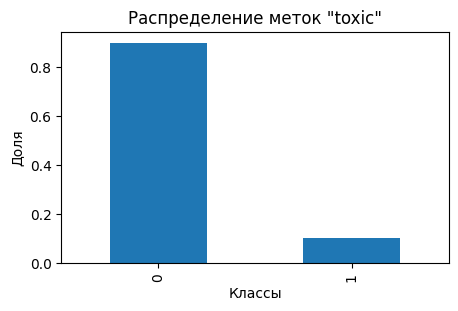

In [12]:
_ = df['toxic'].value_counts(normalize=True).plot(kind='bar', figsize=(5, 3))

# Добавление заголовка графика
plt.title('Распределение меток "toxic"')

# Добавление подписи к оси x
plt.xlabel('Классы')

# Добавление подписи к оси y
plt.ylabel('Доля')

# Отображение графика
plt.show()

Данные несбалансированные, количество токсичных комментариев составляет приблизительно 10% от их общего числа.

### Общие данные о BERT

BERT (Bidirectional Encoder Representations from Transformers) - это модель представления языка, которая основана на архитектуре Transformers и предназначена для обработки текстовых данных. Он был разработан и представлен командой исследователей в Google AI Language в 2018 году.

BERT является предварительно обученной моделью, которая способна извлекать высококачественные контекстные представления слов и предложений. Основное преимущество BERT заключается в его способности анализировать контекст с обеих сторон и понимать взаимосвязи слов и фраз в предложениях. За счет разметки двунаправленной модели языковой модели BERT способен представлять слова в контексте, а не независимо от контекста, что делает его особенно мощным при работе с естественным языком.

BERT обучается на больших объемах текстовых данных с использованием задач маскирования слов и предсказания следующего предложения. После этого он может быть дообучен на специфических текстовых задачах, таких как классификация текста, вопросно-ответные системы, определение тональности, машинный перевод и другие.

Множество исследований и практических применений показали, что BERT достигает хороших результатов на различных задачах обработки текста и является одной из наиболее популярных предварительно обученных моделей в этой области.

**Ввиду ограниченности времени принято решение отказаться от BERT**

### Предобработка и удаление нежелательных символов

In [13]:
def convert_text_to_lowercase(dataframe, column):
    """
    Функция приводит текст в указанной колонке датафрейма к нижнему регистру.

    Аргументы:
    - dataframe: pandas.DataFrame - датафрейм, содержащий текст
    - column: str - название колонки, содержащей текст

    Возвращает:
    - pandas.DataFrame - датафрейм с преобразованным текстом
    """
    dataframe[column] = dataframe[column].str.lower()
    return dataframe

In [14]:
df1 = df.copy()

In [15]:
# приведем датафрейм к нижнему регистру

df1 = convert_text_to_lowercase(df1, 'text')

In [16]:
df1.sample(5)

,text,toxic
53494,my name is reaper eternal and i am a stupid dumasss small dik retard,1
20915,"edits \n\nreworking article at present as several appearances are missing and many statements have no sources. as for alternate versions, just the gist, without unnecessary detail and sources in text which flips the universe tense.",0
27200,"""\n\n creation of deleted page: vimla batham \n\nhello , you had deleted page vimla batham (here). i just wanted to let you know that i have recreated the page as per the guidelines (please note that i was previously not involved with this page). i hope this meets the requirements and you will be fine with it. please let me know if you have any issues. thanks, (talk) """,0
4666,keep up your excellent work!,0
110458,"emmerdale \n\nso, how do you feel now jimmy boy?? a mug?",0


In [17]:
# произведем чистку текста

def clean_text(text):
    
    # Удаление текста внутри скобок [], (), замена на пробел
    text = re.sub(r'\[.*?\]|\(.*?\)', ' ', text)
    
    # Удаление HTML-тегов
    text = re.sub(r'<[^>]+>', '', text)

    # Удаление веб-ссылок
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Вставка пробелов между определенными шаблонами (например, "ie", "eg")
    text = re.sub(r'(\s)([iI][eE]|[eE][gG])(\s)', r' \2 ', text)

    # Удаление \n и \n\n, замена на пробел
    text = re.sub(r'\n\n|\n', ' ', text)

    # Удаление "", замена на пробел
    text = re.sub(r'""|"', ' ', text)

    # Замена расширения файла на пробел
    text = re.sub(r'\.[a-zA-Z0-9]+', ' ', text)

    # Замена обнаруженных странных структур на пробел
    text = re.sub(r'wp:ref|c s r s|j s r s|b b|c c|d d|rwy', ' ', text)

    # Удаление всех символов не на английском языке
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Удаление специальных символов, знаков пунктуации и цифр
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Удаление лишних пробелов
    text = ' '.join(text.split())

    return text.lower()


In [18]:
df2 = df1.copy()

In [19]:
%%time

df2['text'] = df1['text'].apply(clean_text)

CPU times: total: 10 s
Wall time: 15.8 s


In [20]:
df2.sample(5)

,text,toxic
3388,not just church i think there should be something about the whole village not just the church,0
112830,combination to post it just type user dinosaur fan christmas songs it would be like this,0
155472,may it s now in your archive it was the brief thread about vintagekit s use of a sock puppet and canvassing somewhere around the beginning of march,0
42470,something look renzoy i m sorry for attacking you you are the great editor in wikipedia,0
53087,i am including them because a the diocese info box contains this parameter b latin is the official language of the catholi hurch c they are all coming from i any idiot s basic understanding of latin ii the catholic hierarchy website d this is an encyclopedia all notable information should be included lest it be necessary for some users,0


### Лемматизация

Лемматизация — процесс приведения слова к его базовой форме (лемме) для улучшения качества анализа текста и уменьшения размерности данных.

Например, слова "running", "runs" и "ran" могут быть приведены к лемме "run".

In [21]:
# Установка и загрузка ресурсов
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\titar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\titar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
#def lemmatize_text(text):
    # Разделение на отдельные слова
#    words = nltk.word_tokenize(text)
    
    # Лемматизация слов и удаление стоп-слов
#    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    
    # Соединение слов в строку
#    lemmatized_text = ' '.join(lemmatized_words)
    
#    return lemmatized_text

Библиотека spaCy — это высокоэффективная библиотека для обработки естественного языка (NLP) на языке Python. Она предоставляет удобные инструменты для выполнения различных задач обработки текста, включая токенизацию, лемматизацию, морфологический анализ, разбор синтаксиса, распознавание именованных сущностей, а также предсказание зависимостей и семантическую разметку.

Особенности и возможности библиотеки spaCy:

1. Высокая производительность: spaCy создан для быстрой обработки текстовых данных. Она написана на языке Cython, что обеспечивает высокую скорость работы и эффективное использование памяти.

2. Разнообразные языковые модели: spaCy предоставляет готовые языковые модели для множества языков. Они обучены на огромных объемах текстовых данных и включают информацию о токенизации, лемматизации, частях речи, синтаксических зависимостях и именованных сущностях.

3. Простота в использовании: Интерфейсы spaCy просты и интуитивно понятны, что упрощает выполнение обработки текста. Они предоставляют удобные методы для извлечения информации из текста и работают с различными структурами данных, такими как токены, предложения и деревья разбора.

4. Гибкость и расширяемость: spaCy легко расширяется путем добавления пользовательских компонентов и правил. Это позволяет настраивать функциональность spaCy для конкретных потребностей и задач обработки текста.

5. Программное обеспечение с открытым исходным кодом: spaCy распространяется бесплатно по лицензии MIT и имеет активное сообщество разработчиков. Это позволяет обмениваться идеями, получать поддержку и вносить вклад в улучшение библиотеки.

Для больших объемов текста SpaCy рекомендует использовать nlp.pipe, который может работать в пакетах batch_size(Допустим batch_size=64, тогда все наши данные делятся на 64 пакета (как прям в фолдах, только там мы пишем число на сколько поделить наши данные (3/5/10 частей),а тут пишем, сколько данных отдать в обработку) и имеет встроенную поддержку многопроцессорной обработки n_process (аналог n_jobs для GridSearchCV).

Кроме того, нужно убедиться, что мы отключили все элементы конвейера, которые мы не планируем использовать, поскольку они просто потратят время на обработку. Если мы выполняем только лемматизацию, то необходимо передать disable=["parser", "ner"] к nlp.pipe.

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
new_corpus = []

for doc in tqdm(nlp.pipe(df2['text'], batch_size=64, n_process=-1, disable=["parser", "ner"]), total=len(df2['text'])):
    word_list = [tok.lemma_ for tok in doc]
    new_corpus.append(' '.join(word_list))

100%|██████████| 159292/159292 [06:54<00:00, 383.90it/s]


In [25]:
df3 = df2.copy()

In [26]:
df3['text'] = new_corpus

In [27]:
df3.head(5)

,text,toxic
0,explanation why the edit make under my username hardcore metallica fan be revert they weren t vandalism just closure on some gas after I vote at new york dolls fac and please don t remove the template from the talk page since I m retire now,0
1,d aww he match this background colour I m seemingly stuck with thank january,0
2,hey man I m really not try to edit war it s just that this guy be constantly remove relevant information and talk to I through edit instead of my talk page he seem to care more about the formatting than the actual info,0
3,more I can t make any real suggestion on improvement I wonder if the section statistic should be later on or a subsection of type of accident I think the reference may need tidying so that they be all in the exact same format ie date format etc I can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let I know there appear to be a backlog on article for review so I guess there may be a delay until a reviewer turn up it s list in the relevant form eg wikipedia good article nomination transport,0
4,you sir be my hero any chance you remember what page that s on,0


### Выводы по разделу

Данные успешно загружены. Размерность полученного массива 159292, 3. В данных не обнаружено пропусков и дубликатов. Корпус текста приведен к нижнему регистру, очищен от символов, ссылок и т.д. Произведена лемматизация текста с помощью библиотеки spaCy.

## Обучение

### Выделим в данных обучающие признаки и целевые показатели

In [28]:
features = df3.drop(['toxic'], axis=1)
target = df3['toxic']

In [29]:
features.head(5)

,text
0,explanation why the edit make under my username hardcore metallica fan be revert they weren t vandalism just closure on some gas after I vote at new york dolls fac and please don t remove the template from the talk page since I m retire now
1,d aww he match this background colour I m seemingly stuck with thank january
2,hey man I m really not try to edit war it s just that this guy be constantly remove relevant information and talk to I through edit instead of my talk page he seem to care more about the formatting than the actual info
3,more I can t make any real suggestion on improvement I wonder if the section statistic should be later on or a subsection of type of accident I think the reference may need tidying so that they be all in the exact same format ie date format etc I can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let I know there appear to be a backlog on article for review so I guess there may be a delay until a reviewer turn up it s list in the relevant form eg wikipedia good article nomination transport
4,you sir be my hero any chance you remember what page that s on


In [30]:
features.shape

(159292, 1)

In [31]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: toxic, dtype: int64

In [32]:
target.shape

(159292,)

### Разделим выборку на обучающие и тестовые данные

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42, stratify=target)

In [34]:
X_train.shape

(143362, 1)

In [35]:
type(X_train)

pandas.core.frame.DataFrame

In [36]:
y_train.shape

(143362,)

In [37]:
type(y_train)

pandas.core.series.Series

In [38]:
X_test.shape

(15930, 1)

In [39]:
y_test.shape

(15930,)

### Модель

LogisticRegression() - это классификатор, который находится в модуле sklearn.linear_model в библиотеке scikit-learn (sklearn). Он используется для решения задач классификации, где требуется предсказывать, принадлежит ли образец к одному классу или другому.

Если в конвейере задать имя поля одной строкой, то на входе в трансформер будет столбец (как Series), что и требуется tfidf. Если списком (квадратные скобки, даже с одним столбцом), то на входе будет таблица (DataFrame).

In [41]:
pipeline = Pipeline(
    [
        (
            "vect",
            ColumnTransformer(
                        [
                            ("tfidf", TfidfVectorizer(), "text")
                        ]
                               )
        ),
        (
            "clf",
            VotingClassifier(estimators=[('logreg', LogisticRegression(class_weight="balanced")),
                                        ('svc', LinearSVC(class_weight="balanced"))])
        )
    ]
)

pipeline

Pipeline(steps=[('vect',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'text')])),
                ('clf',
                 VotingClassifier(estimators=[('logreg',
                                               LogisticRegression(class_weight='balanced')),
                                              ('svc',
                                               LinearSVC(class_weight='balanced'))]))])

In [42]:
pipeline.steps[-1]

('clf',
 VotingClassifier(estimators=[('logreg',
                               LogisticRegression(class_weight='balanced')),
                              ('svc', LinearSVC(class_weight='balanced'))]))

In [43]:
parameter_grid = {
    "vect__tfidf__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__tfidf__min_df": (1, 3, 5, 10),
    "vect__tfidf__ngram_range": ((1, 1), (1, 2)),  # униграммы или биграммы
    "vect__tfidf__norm": ("l1", "l2"),
    "clf__logreg__C": (0.1, 0.5, 1.0, 2.0),
    "clf__svc__C": (0.1, 0.5, 1.0, 2.0),    
                  }

In [44]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    cv=3,
    n_iter=40,
    random_state=42,
    scoring='f1',
    verbose=1,
    n_jobs=-1)

In [45]:
%%time

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
CPU times: total: 2min 1s
Wall time: 15min 53s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vect',
                                              ColumnTransformer(transformers=[('tfidf',
                                                                               TfidfVectorizer(),
                                                                               'text')])),
                                             ('clf',
                                              VotingClassifier(estimators=[('logreg',
                                                                            LogisticRegression(class_weight='balanced')),
                                                                           ('svc',
                                                                            LinearSVC(class_weight='balanced'))]))]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'clf__logreg__C': (0.1, 0.5, 1.0, 2.0),
                                        'clf__svc__C': (0.1, 0.5, 1.0, 2.0),
                                        'vect__tfidf__max_df': (0.2, 0.4, 0.6,
                                                                0.8, 1.0),
                                        'vect__tfidf__min_df': (1, 3, 5, 10),
                                        'vect__tfidf__ngram_range': ((1, 1),
                                                                     (1, 2)),
                                        'vect__tfidf__norm': ('l1', 'l2')},
                   random_state=42, scoring='f1', verbose=1)

In [46]:
random_search.best_params_

{'vect__tfidf__norm': 'l2',
 'vect__tfidf__ngram_range': (1, 2),
 'vect__tfidf__min_df': 1,
 'vect__tfidf__max_df': 0.4,
 'clf__svc__C': 2.0,
 'clf__logreg__C': 1.0}

In [47]:
random_search.best_score_

0.7901788977436693

### Выводы по разделу

Выделены обучающие и целевые признаки. Признаки разделены на тренировочные и тестовые. Создан конвейер (применены методы борьбы с дисбалансом, как при выборе библиотеки конвейера так и при определении гиперпараметров), в котором производится векторизация признаков и передача их в эстиматор - ансамбль из логической регрессии и LinearSVC.

Для подбора оптимальных гиперпараметров использовалась функция RandomizedSearchCV.

Метрика F1 на валидационной выборке 0.790.

## Выводы

In [48]:
# Создание и обучение модели-заглушки
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Получение предсказаний на тестовом наборе данных
y_pred = dummy.predict(X_test)

# Вычисление F1-меры
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1}")

F1: 0.0


In [49]:
%%time

y_pred = random_search.best_estimator_.predict(X_test)

F1 = f1_score(y_test, y_pred)
print(f"F1: {F1}")

F1: 0.814646791963707
CPU times: total: 1.88 s
Wall time: 1.95 s


### Выводы по разделу

Произведена проверка метрики F1 на тестовой выборке. Её значение составило 0.815.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны

## Вывод

Данные успешно загружены. Размерность полученного массива 159292, 3. В данных не обнаружено пропусков и дубликатов. Корпус текста приведен к нижнему регистру, очищен от символов, ссылок и т.д. Произведена лемматизация текста с помощью библиотеки spaCy.

Выделены обучающие и целевые признаки. Признаки разделены на тренировочные и тестовые. Создан конвейер (применены методы борьбы с дисбалансом, как при выборе библиотеки конвейера так и при определении гиперпараметров), в котором производится векторизация признаков и передача их в эстиматор - ансамбль из логической регрессии и LinearSVC.

Для подбора оптимальных гиперпараметров использовалась функция RandomizedSearchCV.

Метрика F1 на валидационной выборке 0.790.

Произведена проверка метрики F1 на тестовой выборке. Её значение составило **0.815**.